# Laplace equation 2D

$$ \nabla^{2} u(\rho, \phi) = \frac{\partial^{2} u(\rho, \phi)}{\partial \rho^{2}} + \frac{1}{\rho}\frac{\partial u(\rho, \phi) }{\partial \rho} + \frac{1}{\rho^{2}}\frac{\partial^{2} u(\rho, \phi) }{\partial \phi^{2}} = 0$$

In [1]:
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

In [3]:
N = 20
r = np.linspace(0.,1.,N)
phi = np.linspace(0.,2*np.pi,N)
dr = r[1] - r[0]
dphi = phi[1] - phi[0]
lambda_ = dr/dphi
print(lambda_)

0.15915494309189535


In [4]:
r[0], r[1], 1/(N-1)

(0.0, 0.05263157894736842, 0.05263157894736842)

In [5]:
phi[1]

0.3306939635357677

In [126]:
def h1(phi):

    if phi < np.pi:
        return 20.
    else:
        return 10.

In [127]:
def InitT():

    T = np.zeros((N,N))

    for i in range(len(phi)):
        T[-1,i] = h1(phi[i])

    return T

In [128]:
T = InitT()
print(T)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [129]:
def GetRelaxation(Nit = 3000, omega = 1.8, tolerancia = 1e-1):

    itmax = 0

    #for it in tqdm(range(Nit)):
    for it in range(Nit):

        dmax = 0.

        for i in range(1, len(r)-1): # No tocar las fronteras
            for j in range(len(phi)):

                if j == len(phi) - 1: # Condicion de periodicidad
                    b = 1
                else:
                    b = j+1

                c = 2. - dr / r[i] + 2*(lambda_/r[i])**2
                tmp = T[i+1,j] + (1-dr/r[i])*T[i-1,j] + (lambda_/r[i])**2*(T[i,b]+T[i,j-1])
                tmp /= c
                r1 = omega*(tmp-T[i,j])
                T[i,j] += r1

                if np.abs(r1) > dmax:
                    dmax = r1

        if dmax < tolerancia:
            print(it)
            itmax = it
            break

In [130]:
print( len(r)-1)

19


In [131]:
GetRelaxation(500)

Streaming output truncated to the last 5000 lines.
52.973088991354054
53.55508639642686
53.85103376855655
53.902782132348094
53.786266542472305
53.38788232232049
52.68093201883326
51.63894339949948
50.43193990843267
49.213028828464466
48.14914834343707
47.380228199614024
46.97081199903041
46.91311497686927
47.19842317274077
47.84880788734929
48.89138381383941
50.28762607641019
51.9116040035557
41.79770760315583
42.66286896314013
43.31543425200563
43.68307655312343
43.79744736872408
43.677194709017115
43.26003260391323
42.55003138001335
41.49978451427789
40.23444166959284
38.91623731056536
37.75250537091335
36.897121508075706
36.40618021534834
36.27803246339056
36.51360443739574
37.12518790816395
38.13924691959026
39.55259554139488
41.26060684642607
37.30648659524185
38.29787141213178
39.030119836858404
39.45489443985634
39.61793711233877
39.51417987920106
39.088791033357
38.344425028170605
37.2230001934841
35.822491454721145
34.3264578685916
33.01687021534698
32.069858429292346
31.5191

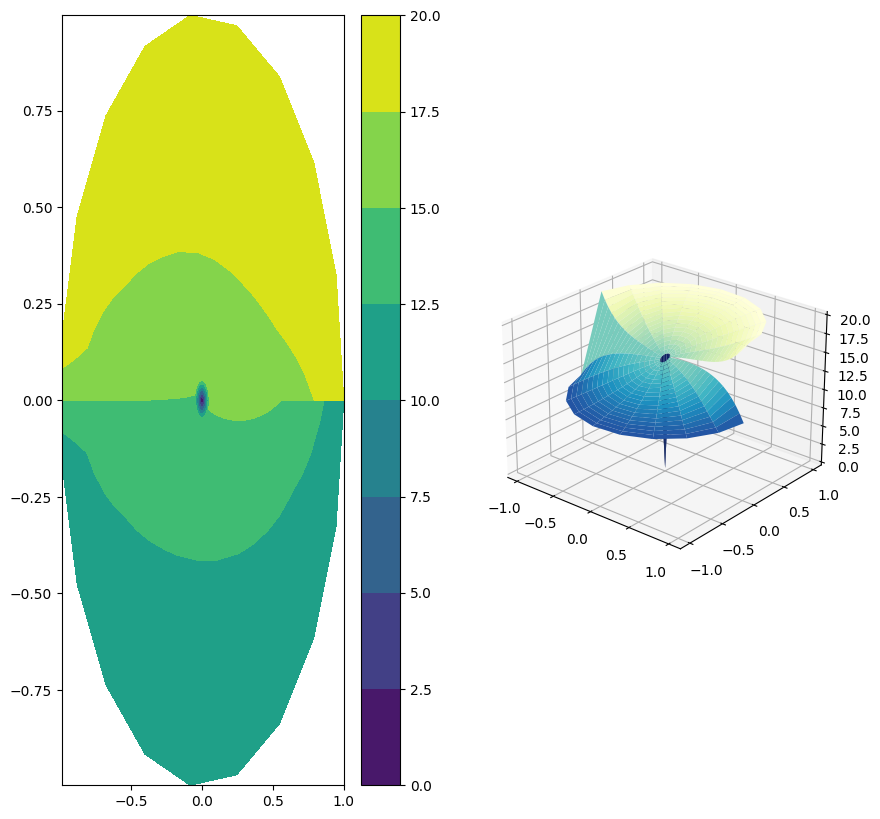

In [132]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2, projection = '3d', elev = 25, azim = -50)

R, Phi = np.meshgrid(r,phi)

X, Y = R*np.cos(Phi), R*np.sin(Phi)

c = ax.contourf(X,Y,T.T)
fig.colorbar(c,ax=ax)

ax1.plot_surface(X,Y,T.T,cmap=plt.cm.YlGnBu_r)
plt.show()

In [133]:
def GetGradient(T):

    M, N = T.shape

    U = np.zeros_like(T)
    V = np.zeros_like(T)

    u,v = np.gradient(T)


    for i in range(M):
        for j in range(N):
            U[i,j] = u[i,j]*np.cos(phi[j]) - v[i,j]*np.sin(phi[j])
            V[i,j] = u[i,j]*np.sin(phi[j]) + v[i,j]*np.cos(phi[j])

    return U.T,V.T

In [134]:
U,V = GetGradient(T)
U = - U
V = - V

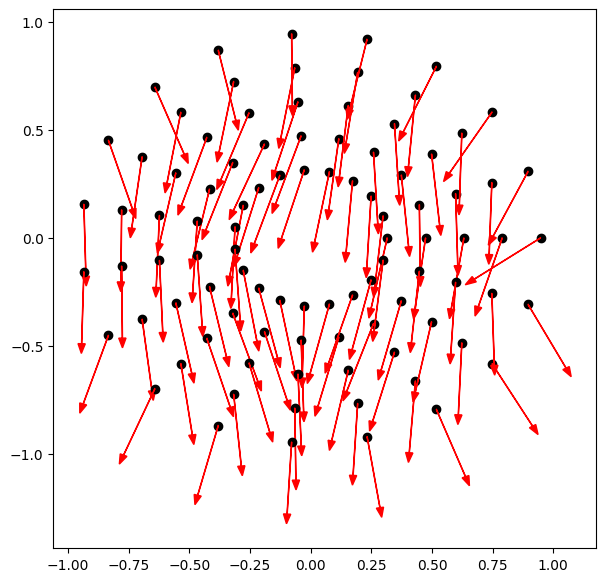

In [141]:
fig2 = plt.figure(figsize=(7,7))
ax2 = fig2.add_subplot(1,1,1)



for i in range(r.shape[0]-1):
    for j in range(4,phi.shape[0]):

         #if i%2 == 0   and j%2==0:
         if j%3  == 0:
                ax2.scatter(X[i,j],Y[i,j],color='k')
                #ax2.arrow(X[i,j],Y[i,j],U[i,j]/U[i, j],V[i,j]/V[i,j],color='r', head_width=0.03, width=0.001)
                ax2.arrow(X[i,j],Y[i,j],U[i,j]/(3*np.sqrt(U[i, j]**2 + V[i,j]**2)),V[i,j]/(3*np.sqrt(U[i, j]**2 + V[i,j]**2)),color='r', head_width=0.03, width=0.001)


**Reference:** Profesor Manuel Alejandro Segura, Profesor Diego Useche Reyes